In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score

In [2]:
data = np.load ("data_SAAB_SIRS_77GHz_FMCW.npy", allow_pickle=True)

In [3]:
# Display information about the dataset
print(data.shape)
print(data[0][0])  # Display the data type for the first measurement

(130, 6)
['D1']


In [47]:
# Extract Features and Labels
X = []
y = []

for item in data:
    # Check for null values
    if item[1] is not None:  # Assuming the shape of the data matrix is (1280,)
        X.append(item[1])
        y.append(item[0])

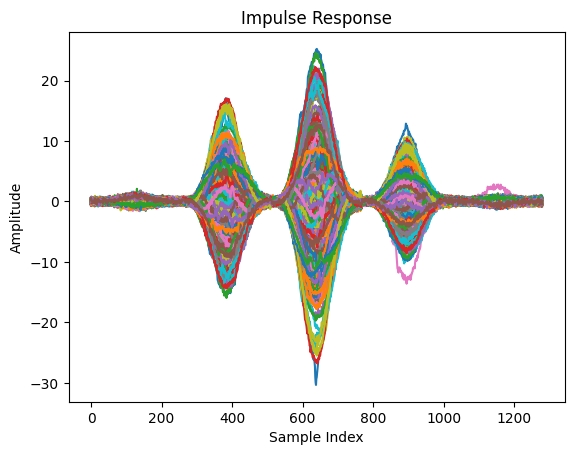

In [91]:
# Plot impulse response for a sample (adjust the index as needed)
plt.plot(np.concatenate((X[0].real, X[0].imag), axis=1))  
plt.title("Impulse Response")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.show()

In [25]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

c:\Users\lenovo\miniconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
print (type(X_train), type(y_train))

<class 'list'> <class 'numpy.ndarray'>


In [66]:
# Assuming each element in X_train and X_test is a 2D array
X_train = np.array([np.mean(segment, axis=1) for segment in X_train])
X_test= np.array([np.mean(segment, axis=1) for segment in X_test])

# # Reshape to make it 2D
X_train_fixed = X_train.reshape(X_train.shape[0], -1)
X_test_fixed = X_test.reshape(X_test.shape[0], -1)

print (type(X_train_fixed))

<class 'numpy.ndarray'>


In [67]:
# Flatten the real and imaginary parts into a single vector
X_train_flatten = np.concatenate((X_train.real, X_train.imag), axis=1)
X_test_flatten = np.concatenate((X_test.real, X_test.imag), axis=1)

In [86]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_flatten, y_train)

RandomForestClassifier(random_state=42)

In [87]:
# Evaluate the model on the test set
y_pred = rf_model.predict(X_test_flatten)

#checking for the accuracy using the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred, average='weighted')))
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))


Confusion Matrix:
 [[3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 1 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 2 0 0 1 0]
 [0 0 0 0 0 0 1 0 3 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 7 0]
 [0 0 0 0 0 0 0 0 1 0]]
F1 Score: 0.4957
Accuracy: 0.5769


In [77]:
# Train Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_flatten, y_train)

SVC(kernel='linear', random_state=42)

In [84]:
y_pred_svm = svm_model.predict(X_test_flatten)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred_svm, average='weighted')))
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_svm)))

Confusion Matrix:
 [[0 0 2 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 1 0]
 [0 0 0 2 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 3 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0]
 [0 2 1 0 1 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]]
F1 Score: 0.2462
Accuracy: 0.2692


In [81]:
# Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_flatten, y_train)

GradientBoostingClassifier(random_state=42)

In [89]:
print("\nGradient Boosting Classifier:")
y_pred_gb = gb_model.predict(X_test_flatten)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred_gb, average='weighted')))
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_gb)))


Gradient Boosting Classifier:
Confusion Matrix:
 [[2 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 1 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 1 0 0 5 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0]]
F1 Score: 0.3188
Accuracy: 0.3462


In [90]:
# Example prediction for a new data point (replace with actual data)
new_data_point = X_test_flatten[0].reshape(1, -1)
predicted_class = label_encoder.inverse_transform(rf_model.predict(new_data_point))
print("Predicted Class:", predicted_class[0])

Predicted Class: seagull
